In [1]:
import numpy
import pandas as pd
import numpy as np
from pgmpy.estimators import BdeuScore, K2Score, BicScore
from pgmpy.models import BayesianModel
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BayesianEstimator
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
puma_05 = pd.read_csv("../Data/Cleaned/puma_05.csv")

In [3]:
puma_05.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
puma_05.columns

Index([u'SERIALNO', u'Official_Poverty', u'CEO_Income', u'FICAtax',
       u'PovunitType', u'EducAttain_2', u'WorkExpIndiv', u'Povunit',
       u'IncomeTax', u'ACR', u'SchoolBreakfast', u'HEAP', u'CitizenStatus',
       u'Official_Threshold', u'AgeCateg_2', u'AgeCateg_3', u'EducAttain_4',
       u'CEO_Poverty', u'PUMA', u'WIC', u'EducAttain_ ', u'HousingStatus',
       u'WorkersEquiv', u'SchoolLunch', u'CEO_Threshold', u'AgeCateg_1',
       u'Boro', u'MOOP', u'MV', u'Childcare', u'EducAttain_3', u'PreTaxIncome',
       u'NP', u'EducAttain_1', u'FoodStamps', u'JWTR', u'Commuting',
       u'Housing', u'Ethnicity'],
      dtype='object')

In [43]:
thresholds = pd.Series(puma_05.CEO_Threshold.unique())

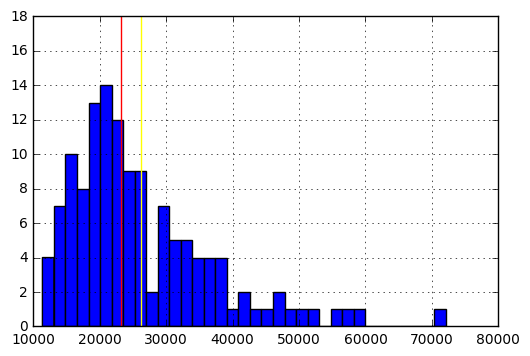

In [44]:
thresholds.hist(bins=35)
plt.vlines(x=thresholds.median(), ymin=0, ymax=18, color = 'red')
plt.vlines(x=thresholds.mean(), ymin=0, ymax=18, color = 'yellow')

In [110]:
puma_05[puma_05.CEO_Threshold == puma_05.CEO_Threshold.max()]

,SERIALNO,PUMA,Official_Poverty,AgeCateg,CitizenStatus,CEO_Poverty,Official_Threshold,MOOP,Nabe,EducAttain,...,CD,CEO_Income,Housing,CEO_Threshold,IncomeTax,HousingStatus,WIC,Childcare,Povunit,WorkersEquiv
7359,370930,3706,2,2,1,2,37757,0.0,6,1,...,5,146578.838247,5201.448444,72117.007717,-9017.567239,4,0.0,0.0,1,1


In [45]:
thresholds.describe()

count      131.000000
mean     26200.793166
std      10917.609603
min      11369.675603
25%      19059.902619
50%      23272.281307
75%      31344.462632
max      72117.007717
dtype: float64

In [46]:
thresholds.quantile(0.99)

58369.204870079979

In [47]:
thresholds_of = pd.Series(puma_05.Official_Threshold.unique())

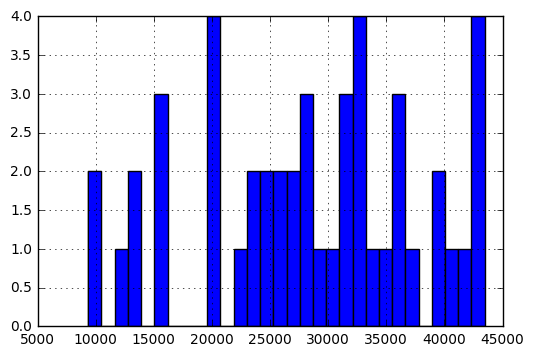

In [48]:
thresholds_of.hist(bins=30)

In [49]:
puma_14 = pd.read_csv("../Data/Cleaned/puma_14.csv")

In [50]:
puma_14.drop(['Unnamed: 0'], axis=1, inplace=True)

In [51]:
thresholds_14 = pd.Series(puma_14.CEO_Threshold.unique())

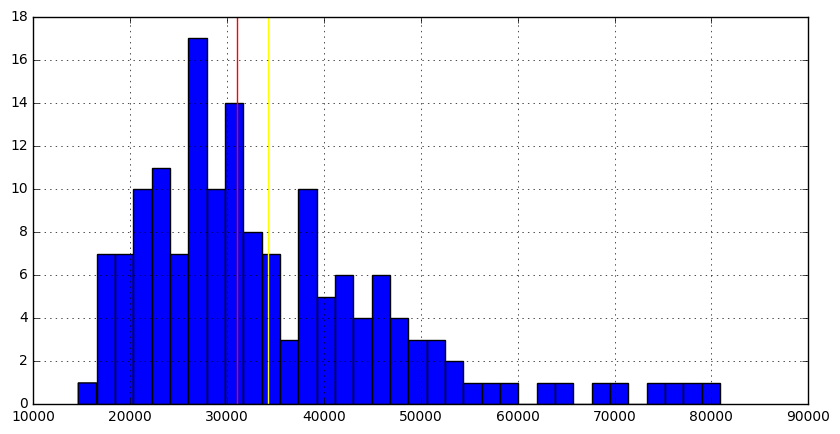

In [52]:
thresholds_14.hist(bins=35, figsize=(10,5))
plt.vlines(x=thresholds_14.median(), ymin=0, ymax=18, color = 'red')
plt.vlines(x=thresholds_14.mean(), ymin=0, ymax=18, color = 'yellow')

In [53]:
thresholds_14_of = pd.Series(puma_14.Official_Threshold.unique())

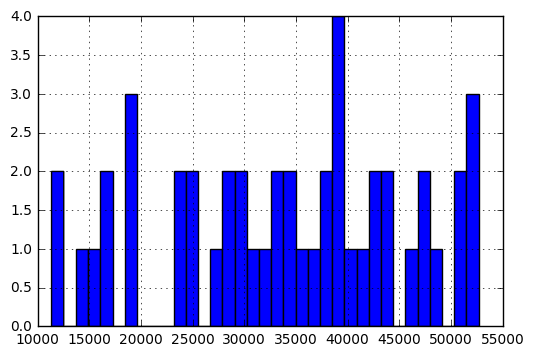

In [54]:
thresholds_14_of.hist(bins=35)

In [55]:
puma_10 = pd.read_csv("../Data/Cleaned/puma_10.csv")

In [56]:
puma_10.drop(['Unnamed: 0'], axis=1, inplace=True)

In [57]:
thresholds_10 = pd.Series(puma_10.CEO_Threshold.unique())

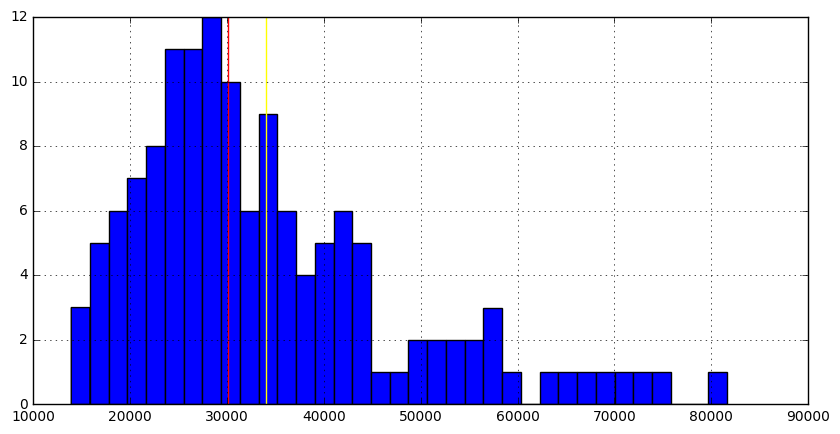

In [58]:
thresholds_10.hist(bins=35, figsize=(10,5))
plt.vlines(x=thresholds_10.median(), ymin=0, ymax=12, color = 'red')
plt.vlines(x=thresholds_10.mean(), ymin=0, ymax=12, color = 'yellow')

In [78]:
puma_threshold0 = puma_05.groupby('PUMA').agg({'CEO_Threshold':'mean'}).reset_index()
puma_threshold0.columns = ['PUMA', 'Threshold0']

In [79]:
df = pd.merge(puma_05, puma_threshold0, on='PUMA', how='inner')

In [80]:
df['Threshold1'] = 1.5 * df.Threshold0 

In [93]:
for i in xrange(len(df)):
    if (df.CEO_Income[i] >= df.Threshold0[i]) & (df.CEO_Income[i] <= df.Threshold1[i]):
        df.loc[i,'Pov_risk'] = 1
    elif (df.CEO_Income[i] < df.Threshold0[i]):
        df.loc[i, 'Pov_risk'] = 0
    elif (df.CEO_Income[i] > df.Threshold1[i]):
        df.loc[i, 'Pov_risk'] = 2

In [83]:
def create_thresholds(puma):
    
    threshold0 = puma.groupby('PUMA').agg({'CEO_Threshold':'mean'}).reset_index()
    threshold0.columns = ['PUMA', 'CEO_Threshold_mean']
    puma = pd.merge(puma, threshold0, on='PUMA', how='inner')
    puma['Threshold1'] = 1.5 * puma.Threshold0 
    create_label(puma)

In [86]:
def create_label(puma):
    print puma
    if (puma.CEO_Income >= df.Threshold0) & (df.CEO_Income <= df.Threshold1):
        df['Pov_risk'] = 1
    elif (df.CEO_Income < df.Threshold0):
        df['Pov_risk'] = 0
    elif (df.CEO_Income > df.Threshold1):
        df['Pov_risk'] = 2

# New check without aggregation

In [138]:
puma_05.CEO_Income.describe()

count     24700.000000
mean      46680.881789
std       48565.104282
min      -62079.462714
25%       18775.897667
50%       33989.774250
75%       58077.278595
max      631767.710509
Name: CEO_Income, dtype: float64

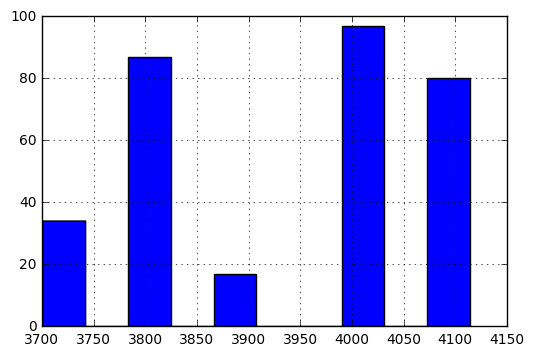

In [145]:
puma_05[puma_05.CEO_Income < 0]['PUMA'].hist()

In [142]:
puma_05[puma_05.SERIALNO == 812]

,SERIALNO,Official_Poverty,CEO_Income,FICAtax,PovunitType,EducAttain_2,WorkExpIndiv,Povunit,IncomeTax,ACR,...,EducAttain_3,PreTaxIncome,NP,EducAttain_1,FoodStamps,JWTR,Commuting,Housing,Ethnicity,Threshold1
20,812,1,-4.0,0.0,8,1,3,1,0.0,0,...,1,0.0,1,1,0.0,0,0.0,0.0,3,17054.513405


In [147]:
puma_05[puma_05.CEO_Income == 0]

,SERIALNO,Official_Poverty,CEO_Income,FICAtax,PovunitType,EducAttain_2,WorkExpIndiv,Povunit,IncomeTax,ACR,...,EducAttain_3,PreTaxIncome,NP,EducAttain_1,FoodStamps,JWTR,Commuting,Housing,Ethnicity,Threshold1
344,18471,1,0.0,0.0,8,1,3,1,0.0,0,...,1,0.0,1,1,0.0,0,0.0,0.0,1,17054.513405
5212,266239,1,0.0,0.0,8,1,3,1,0.0,0,...,1,0.0,1,1,0.0,0,0.0,0.0,3,17054.513405
5475,280093,1,0.0,0.0,6,2,3,1,0.0,0,...,2,0.0,2,2,0.0,0,0.0,0.0,2,24046.863901
6279,318905,1,0.0,0.0,8,1,3,1,0.0,0,...,1,0.0,1,1,0.0,0,0.0,0.0,3,17054.513405
7158,361138,1,0.0,0.0,2,3,3,1,0.0,0,...,3,0.0,3,3,0.0,0,0.0,0.0,3,36797.999658
9787,492339,1,0.0,0.0,8,1,3,1,0.0,0,...,1,0.0,1,1,0.0,0,0.0,0.0,2,17054.513405
10859,547390,1,0.0,0.0,8,1,3,1,0.0,0,...,1,0.0,1,1,0.0,0,0.0,0.0,3,17054.513405
11009,554688,1,0.0,0.0,8,1,3,1,0.0,0,...,1,0.0,1,1,0.0,0,0.0,0.0,1,17054.513405
12619,639119,1,0.0,0.0,7,2,3,2,0.0,1,...,2,0.0,2,2,0.0,0,0.0,0.0,3,17054.513405
13770,694311,1,0.0,0.0,8,1,3,1,0.0,0,...,1,0.0,1,1,0.0,0,0.0,0.0,1,17054.513405


In [157]:
puma_05.CEO_Income.quantile(0.1)

10170.538186399997

In [5]:
puma_05['Threshold1'] = 1.5 * puma_05.CEO_Threshold 

In [6]:
df = puma_05

In [7]:
for i in xrange(len(df)):
    if (df.CEO_Income[i] >= df.CEO_Threshold[i]) & (df.CEO_Income[i] <= df.Threshold1[i]):
        df.loc[i,'Pov_risk'] = 1
    elif (df.CEO_Income[i] < df.CEO_Threshold[i]):
        df.loc[i, 'Pov_risk'] = 0
    elif (df.CEO_Income[i] > df.Threshold1[i]):
        df.loc[i, 'Pov_risk'] = 2

In [8]:
df.head()

,SERIALNO,Official_Poverty,CEO_Income,FICAtax,PovunitType,EducAttain_2,WorkExpIndiv,Povunit,IncomeTax,ACR,...,PreTaxIncome,NP,EducAttain_1,FoodStamps,JWTR,Commuting,Housing,Ethnicity,Threshold1,Pov_risk
0,36,2,39152.657789,4332.683705,1,3,1,1,7032.332806,1,...,56636.3883,3,3,0.00,1,3171.714,0.000000,1,32388.985032,2.0
1,158,2,75911.026767,8654.451885,2,2,2,1,26725.011348,0,...,113130.0900,2,2,0.00,4,1823.600,0.000000,3,24046.863901,2.0
2,194,2,47585.831878,4366.209960,5,2,1,1,10054.308162,1,...,63189.7800,2,2,150.32,1,1383.750,0.000000,3,24046.863901,2.0
3,197,1,13593.164315,0.000000,4,3,3,1,0.000000,0,...,2242.2180,3,3,3506.00,0,90.240,8110.261315,4,32388.985032,0.0
4,207,2,114849.535408,15397.205520,3,4,1,1,43874.879072,1,...,181415.8200,4,4,0.00,1,7259.200,0.000000,3,40990.853747,2.0


In [13]:
df.Pov_risk.value_counts()

2.0    15414
0.0     4783
1.0     4503
Name: Pov_risk, dtype: int64

In [14]:
df[(df.CEO_Poverty == 1)&(df.CEO_Threshold < df.CEO_Income)][['CEO_Threshold', 'CEO_Income','CEO_Poverty', 'Pov_risk', 'Threshold1']]

,CEO_Threshold,CEO_Income,CEO_Poverty,Pov_risk,Threshold1
111,11369.675603,19609.129081,1,2.0,17054.513405
469,11369.675603,15917.908682,1,1.0,17054.513405
834,11369.675603,16226.943379,1,1.0,17054.513405
1199,18118.741543,23785.889888,1,1.0,27178.112315
1509,17534.077009,23231.781546,1,1.0,26301.115513
1688,14263.287946,15942.677128,1,1.0,21394.931918
2027,23272.281307,23298.234386,1,1.0,34908.421961
2177,15227.825393,20542.579466,1,1.0,22841.738090
2946,11369.675603,14613.120234,1,1.0,17054.513405
3146,11369.675603,12844.856225,1,1.0,17054.513405


In [160]:
df[(df.Pov_risk == 1)&((df.CEO_Poverty == 1))][['CEO_Threshold', 'CEO_Income','CEO_Poverty', 'Pov_risk', 'Threshold1']]

,CEO_Threshold,CEO_Income,CEO_Poverty,Pov_risk,Threshold1
469,11369.675603,15917.908682,1,1.0,17054.513405
834,11369.675603,16226.943379,1,1.0,17054.513405
1199,18118.741543,23785.889888,1,1.0,27178.112315
1509,17534.077009,23231.781546,1,1.0,26301.115513
1688,14263.287946,15942.677128,1,1.0,21394.931918
2027,23272.281307,23298.234386,1,1.0,34908.421961
2177,15227.825393,20542.579466,1,1.0,22841.738090
2946,11369.675603,14613.120234,1,1.0,17054.513405
3146,11369.675603,12844.856225,1,1.0,17054.513405
3764,11369.675603,11929.341416,1,1.0,17054.513405


In [9]:
puma_05['year'] = 2005
puma_05['unique_key'] = map(lambda x,y: str(x) + '_' + str(y), puma_05.year, puma_05.SERIALNO)

In [10]:
puma_05.head()

,SERIALNO,Official_Poverty,CEO_Income,FICAtax,PovunitType,EducAttain_2,WorkExpIndiv,Povunit,IncomeTax,ACR,...,EducAttain_1,FoodStamps,JWTR,Commuting,Housing,Ethnicity,Threshold1,Pov_risk,year,unique_key
0,36,2,39152.657789,4332.683705,1,3,1,1,7032.332806,1,...,3,0.00,1,3171.714,0.000000,1,32388.985032,2.0,2005,2005_36
1,158,2,75911.026767,8654.451885,2,2,2,1,26725.011348,0,...,2,0.00,4,1823.600,0.000000,3,24046.863901,2.0,2005,2005_158
2,194,2,47585.831878,4366.209960,5,2,1,1,10054.308162,1,...,2,150.32,1,1383.750,0.000000,3,24046.863901,2.0,2005,2005_194
3,197,1,13593.164315,0.000000,4,3,3,1,0.000000,0,...,3,3506.00,0,90.240,8110.261315,4,32388.985032,0.0,2005,2005_197
4,207,2,114849.535408,15397.205520,3,4,1,1,43874.879072,1,...,4,0.00,1,7259.200,0.000000,3,40990.853747,2.0,2005,2005_207


In [17]:
puma_05.columns

Index([u'SERIALNO', u'Official_Poverty', u'CEO_Income', u'FICAtax',
       u'PovunitType', u'EducAttain_2', u'WorkExpIndiv', u'Povunit',
       u'IncomeTax', u'ACR', u'SchoolBreakfast', u'HEAP', u'CitizenStatus',
       u'Official_Threshold', u'AgeCateg_2', u'AgeCateg_3', u'EducAttain_4',
       u'CEO_Poverty', u'PUMA', u'WIC', u'EducAttain_ ', u'HousingStatus',
       u'WorkersEquiv', u'SchoolLunch', u'CEO_Threshold', u'AgeCateg_1',
       u'Boro', u'MOOP', u'MV', u'Childcare', u'EducAttain_3', u'PreTaxIncome',
       u'NP', u'EducAttain_1', u'FoodStamps', u'JWTR', u'Commuting',
       u'Housing', u'Ethnicity', u'Threshold1', u'Pov_risk', u'year',
       u'unique_key'],
      dtype='object')

In [11]:
X = df[[ u'PovunitType', u'EducAttain_2', u'WorkExpIndiv', u'Povunit',
        u'ACR', u'SchoolBreakfast', u'HEAP', u'CitizenStatus',
        u'AgeCateg_2', u'AgeCateg_3', u'EducAttain_4',
        u'WIC', u'EducAttain_ ', u'HousingStatus',
       u'WorkersEquiv', u'SchoolLunch', u'AgeCateg_1',
       u'MOOP', u'MV', u'Childcare', u'EducAttain_3',
       u'NP', u'EducAttain_1', u'FoodStamps', u'JWTR', u'Commuting',
       u'Housing', 'Pov_risk']]

In [12]:
X.columns

Index([u'PovunitType', u'EducAttain_2', u'WorkExpIndiv', u'Povunit', u'ACR',
       u'SchoolBreakfast', u'HEAP', u'CitizenStatus', u'AgeCateg_2',
       u'AgeCateg_3', u'EducAttain_4', u'WIC', u'EducAttain_ ',
       u'HousingStatus', u'WorkersEquiv', u'SchoolLunch', u'AgeCateg_1',
       u'MOOP', u'MV', u'Childcare', u'EducAttain_3', u'NP', u'EducAttain_1',
       u'FoodStamps', u'JWTR', u'Commuting', u'Housing', u'Pov_risk'],
      dtype='object')

## Changing the value 800 and above to a mean value and taking it as discrete

0.00       24109
215.25       307
430.50       194
645.75        70
861.00        15
1076.25        4
1291.50        1
Name: SchoolBreakfast, dtype: int64


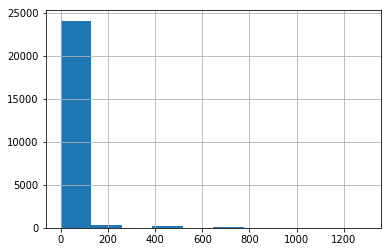

In [61]:
print X.SchoolBreakfast.value_counts()
X.SchoolBreakfast.hist()

0.000000     21155
50.000000     3138
40.000000      271
25.000000       34
20.000000       16
33.333333       13
37.500000        8
16.666667        8
13.333333        7
30.000000        7
41.666667        6
28.571429        5
26.666667        4
32.000000        4
10.000000        2
16.000000        2
42.857143        2
12.500000        2
35.714286        2
35.555556        1
7.142857         1
38.888889        1
8.333333         1
45.454545        1
45.000000        1
35.000000        1
11.428571        1
18.750000        1
6.666667         1
21.428571        1
45.833333        1
8.000000         1
17.142857        1
Name: HEAP, dtype: int64


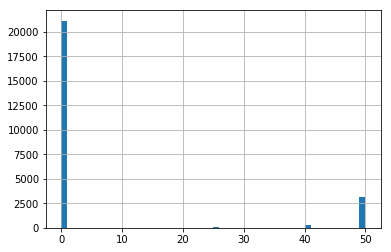

In [82]:
print (X.HEAP).value_counts()
X.HEAP.hist(bins= 50)

In [13]:
X.HEAP[X.HEAP == 0.0] = 0
X.HEAP[X.HEAP != 0.0] = 1

/gpfs1/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/pandas/core/generic.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

In [133]:
X.HEAP.value_counts()

0.0    21155
1.0     3545
Name: HEAP, dtype: int64

0.000000       24304
537.480000       230
1074.960000       90
1612.440000       37
2149.920000        4
322.488000         3
403.110000         3
268.740000         3
644.976000         3
2687.400000        2
179.160000         2
806.220000         2
214.992000         2
429.984000         2
447.900000         2
460.697143         2
671.850000         1
614.262857         1
230.348571         1
1478.070000        1
1433.280000        1
859.968000         1
921.394286         1
358.320000         1
307.131429         1
Name: WIC, dtype: int64


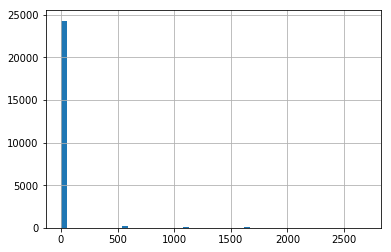

In [135]:
print X.WIC.value_counts()
X.WIC.hist(bins=50)

In [14]:
X.WIC[X.WIC == 0.0] = 0
X.WIC[X.WIC != 0.0] = 1

/gpfs1/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/gpfs1/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [137]:
X.WIC.value_counts()

0.0    24304
1.0      396
Name: WIC, dtype: int64

0.000       22698
428.925      1036
857.850       556
1286.775      209
1715.700       65
359.625        47
788.550        23
2144.625       23
719.250        17
1078.875        6
2573.550        4
1217.475        4
1438.500        3
1148.175        3
1577.100        2
2296.350        1
3002.475        1
1798.125        1
2157.750        1
Name: SchoolLunch, dtype: int64


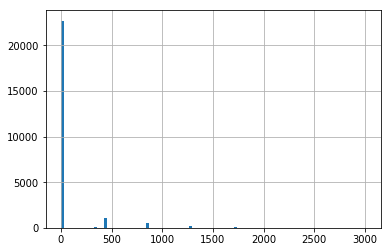

In [140]:
print X.SchoolLunch.value_counts()
X.SchoolLunch.hist(bins = 100)

In [15]:
X.SchoolLunch[X.SchoolLunch == 0.0] = 0
X.SchoolLunch[X.SchoolLunch != 0.0] = 1

/gpfs1/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/gpfs1/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [142]:
X.SchoolLunch.value_counts()

0.0    22698
1.0     2002
Name: SchoolLunch, dtype: int64

count    24700.000000
mean      2916.584694
std       3964.270918
min          0.000000
25%        502.800000
50%       1800.000000
75%       3868.960000
max      85891.480000
Name: MOOP, dtype: float64


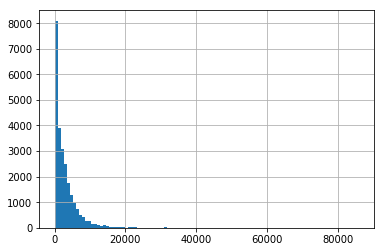

In [22]:
print X.MOOP.describe()
(X.MOOP).hist(bins = 100)

In [23]:
X.MOOP[X.MOOP == 0.0] = 0
X.MOOP[X.MOOP != 0.0] = 1

/gpfs1/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/gpfs1/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


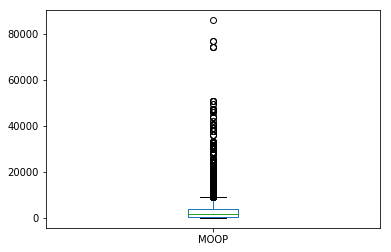

In [152]:
X.MOOP.plot.box()

In [154]:
X.MOOP.quantile(0.95)

9401.2399999999998

In [173]:
X.MOOP.median()

1800.0

In [199]:
X.shape

(24700, 28)

0.000000        23924
5303.158444        16
3181.895067        16
2143.351479        13
2121.263378        11
4286.702958        11
1590.947533        11
2651.579222         9
4242.526755         9
3215.027219         9
1060.631689         8
3977.368833         8
6430.054437         8
530.315844          7
7954.737666         7
5144.043550         7
4507.684678         7
3643.697514         6
1071.675740         6
1286.010887         5
7287.395029         5
9280.527277         5
9015.369355         5
6363.790133         5
2916.737144         5
5358.378698         5
10606.316889        5
1929.016331         5
1500.346035         5
12860.108874        5
                ...  
1800.415242         1
954.568520          1
108.816306          1
1030.457442         1
3314.474028         1
228.443748          1
2937.133908         1
6021.124511         1
12002.768283        1
4754.485513         1
2267.006372         1
4136.463587         1
883.859741          1
5378.987847         1
535.837870

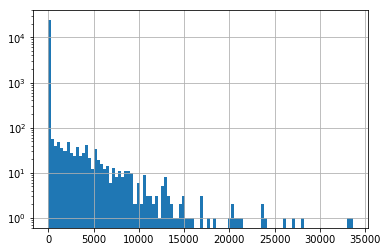

In [200]:
print X.Childcare.value_counts()
X.Childcare.hist(log = True, bins=100)

In [16]:
X.Childcare[X.Childcare == 0.0] = 0
X.Childcare[X.Childcare != 0.0] = 1

/gpfs1/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/gpfs1/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [190]:
X[X.Childcare == 1].Pov_risk.value_counts()

2.0    480
1.0    193
0.0    103
Name: Pov_risk, dtype: int64

In [186]:
X.Childcare.value_counts()

0.0    23924
1.0      776
Name: Childcare, dtype: int64

0.0       20980
1756.0      204
1615.0       61
1905.0       49
1764.0       42
3228.0       41
149.0        14
298.0        14
1607.0       14
120.0        12
140.0        10
1011.0       10
3512.0       10
423.0         9
240.0         9
447.0         9
3371.0        8
2969.0        8
894.0         8
564.0         8
80.0          8
1409.0        7
1897.0        7
4628.0        7
2038.0        6
786.0         6
3208.0        6
200.0         6
1484.0        6
282.0         6
          ...  
3580.0        1
3583.0        1
3594.0        1
3595.0        1
3599.0        1
3600.0        1
3605.0        1
3609.0        1
3611.0        1
3612.0        1
3613.0        1
3635.0        1
3638.0        1
3643.0        1
3714.0        1
3645.0        1
3646.0        1
3650.0        1
3658.0        1
3663.0        1
3665.0        1
3666.0        1
3675.0        1
3676.0        1
3681.0        1
3685.0        1
3695.0        1
3700.0        1
410.0         1
2635.0        1
Name: FoodStamps, dtype:

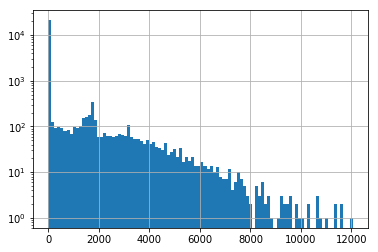

In [204]:
print X.FoodStamps.value_counts()
X.FoodStamps.hist(bins=100, log = True)

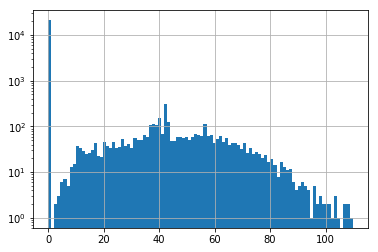

In [203]:
np.sqrt(X.FoodStamps).hist(bins=100, log = True)

In [17]:
X.FoodStamps[X.FoodStamps == 0.0] = 0
X.FoodStamps[X.FoodStamps != 0.0] = 1

/gpfs1/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/gpfs1/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [207]:
X.FoodStamps.value_counts()

0.0    20980
1.0     3720
Name: FoodStamps, dtype: int64

0.000000       7352
940.000000     2298
1128.000000     821
752.000000      769
1316.000000     483
1880.000000     425
564.000000      203
1660.500000     196
1692.000000     181
902.400000      171
1107.000000     154
2256.000000     142
2068.000000     142
830.250000      134
1504.000000     125
376.000000      121
451.200000      114
1328.400000     108
2000.000000     105
553.500000       98
601.600000       94
664.200000       93
188.000000       90
2490.750000      82
1992.600000      73
3321.000000      70
1383.750000      66
676.800000       65
2444.000000      63
721.920000       63
               ... 
2605.040000       1
7000.950000       1
1144.600000       1
3722.860000       1
181.090000        1
2312.300000       1
2207.120000       1
7057.125000       1
950.812500        1
3417.500000       1
3516.224000       1
703.120000        1
3933.500000       1
2998.100000       1
652.750000        1
2130.500000       1
6918.750000       1
2595.960000       1
2526.275000       1


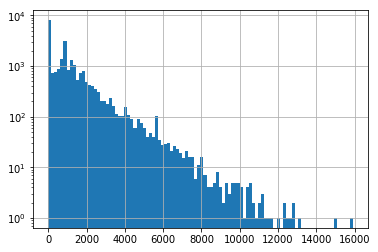

In [210]:
print X.Commuting.value_counts()
X.Commuting.hist(log = True, bins=100)

In [222]:
X[(((X.Commuting - X.Commuting.mean()) / X.Commuting.std()) < 0) &
  (((X.Commuting - X.Commuting.mean()) / X.Commuting.std()) >= -1)].Pov_risk.value_counts()

2.0    8861
0.0    4293
1.0    3469
Name: Pov_risk, dtype: int64

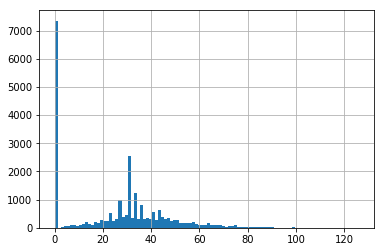

In [244]:
np.sqrt(X.Commuting).hist(bins= 100)

In [257]:
X[(np.sqrt(X.Commuting) < 10)].Pov_risk.value_counts()

2.0    3109
0.0    2969
1.0    1723
Name: Pov_risk, dtype: int64

In [18]:
X.Commuting[X.Commuting == 0.0] = 0
X.Commuting[X.Commuting != 0.0] = 1

/gpfs1/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/gpfs1/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


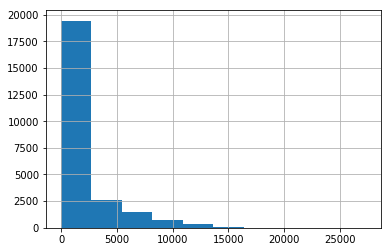

In [72]:
X.Housing.unique()
X.Housing.hist()

In [19]:
X.Housing[X.Housing == 0.0] = 0
X.Housing[X.Housing != 0.0] = 1

/gpfs1/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/gpfs1/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
X.describe()

,PovunitType,EducAttain_2,WorkExpIndiv,Povunit,ACR,SchoolBreakfast,HEAP,CitizenStatus,AgeCateg_2,AgeCateg_3,...,MV,Childcare,EducAttain_3,NP,EducAttain_1,FoodStamps,JWTR,Commuting,Housing,Pov_risk
count,24700.000000,24700.000000,24700.000000,24700.000000,24700.000000,24700.000000,24700.000000,24700.000000,24700.000000,24700.000000,...,24700.000000,24700.000000,24700.000000,24700.000000,24700.000000,24700.000000,24700.000000,24700.000000,24700.000000,24700.000000
mean,4.552713,2.449879,1.894737,1.063725,0.214008,8.636144,0.143522,1.543644,2.449879,2.449879,...,4.275830,0.031417,2.449879,2.449879,2.449879,0.150607,2.713927,0.702348,0.324251,1.430405
std,2.878910,1.542217,0.865700,0.311441,0.426498,62.001165,0.350612,0.735962,1.542217,1.542217,...,1.842098,0.174445,1.542217,1.542217,1.542217,0.357673,3.010277,0.457235,0.468104,0.795280
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,...,4.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,0.000000,2.000000
75%,8.000000,3.000000,3.000000,1.000000,0.000000,0.000000,0.000000,2.000000,3.000000,3.000000,...,6.000000,0.000000,3.000000,3.000000,3.000000,0.000000,4.000000,1.000000,1.000000,2.000000
max,8.000000,18.000000,3.000000,7.000000,3.000000,1291.500000,1.000000,3.000000,18.000000,18.000000,...,7.000000,1.000000,18.000000,18.000000,18.000000,1.000000,12.000000,1.000000,1.000000,2.000000


In [25]:
train,test=train_test_split(X,random_state=9,test_size=0.4)

In [26]:
hc = HillClimbSearch(train, scoring_method=BicScore(train))
best_model = hc.estimate()
print(best_model.edges())

[('Housing', 'HousingStatus'), ('WorkersEquiv', 'SchoolLunch'), ('WorkersEquiv', 'WorkExpIndiv'), ('WorkersEquiv', 'Pov_risk'), ('WorkersEquiv', 'Commuting'), ('WorkersEquiv', 'EducAttain_3'), ('CitizenStatus', 'Pov_risk'), ('AgeCateg_1', 'EducAttain_2'), ('AgeCateg_2', 'PovunitType'), ('AgeCateg_2', 'AgeCateg_1'), ('AgeCateg_3', 'NP'), ('WorkExpIndiv', 'FoodStamps'), ('WorkExpIndiv', 'MV'), ('WorkExpIndiv', 'Childcare'), ('Pov_risk', 'MOOP'), ('Pov_risk', 'FoodStamps'), ('Pov_risk', 'Housing'), ('SchoolLunch', 'SchoolBreakfast'), ('SchoolLunch', 'FoodStamps'), ('SchoolLunch', 'Pov_risk'), ('SchoolLunch', 'CitizenStatus'), ('SchoolLunch', 'MV'), ('JWTR', 'WorkersEquiv'), ('JWTR', 'Commuting'), ('PovunitType', 'WorkExpIndiv'), ('PovunitType', 'WIC'), ('PovunitType', 'HousingStatus'), ('PovunitType', 'Povunit'), ('PovunitType', 'SchoolLunch'), ('PovunitType', 'Childcare'), ('PovunitType', 'HEAP'), ('HEAP', 'MOOP'), ('HEAP', 'WIC'), ('HousingStatus', 'ACR'), ('EducAttain_4', 'EducAttain_1

In [27]:
G = nx.DiGraph()

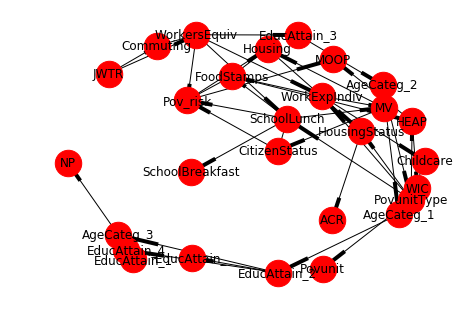

In [34]:
G.add_edges_from(best_model.edges())
nx.draw(G, with_labels=True, arrows=True, node_size=700)